In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import seaborn as sns # enhanced graphical output

# loading data
file = "./GOT_character_predictions.xlsx"
got = pd.read_excel(io        = file,
                       header     = 0,
                       sheet_name = 0)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
got.head(n = 5)

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveFather,isAliveMother,isAliveSpouse,isAliveHeir,age,popularity,isAlive
0,1,Erreg,King,0,Andal,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,0.016722,1
1,2,Hugor of the Hill,King of the Andals,1,Andals,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,0.050167,1
2,3,Azor Ahai,NaN,0,Asshai,NaN,NaN,NaN,NaN,NaN,Nissa Nissa,0,1,1,1,1,NaN,NaN,NaN,1.0,NaN,0.117057,1
3,4,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,NaN,0.745819,1
4,5,Kraznys mo Nakloz,NaN,1,Astapor,NaN,NaN,NaN,NaN,Good Masters,NaN,0,0,1,0,1,NaN,NaN,NaN,NaN,64.0,0.076923,0


In [2]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df



#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [3]:
# pulling up data dictionary
dd = "./GOT_data_dictionary.xlsx"
got_description = pd.read_excel(io        = dd,
                                   header     = 0,
                                   sheet_name = 0)


# displaying the data dictionary
got_description

,S.No,Character number (by order of appearance)
0,name,Character name
1,title,Honorary title(s) given to each character
2,male,"1 = male, 0 = female"
3,culture,Indicates the cultural group of a character
4,dateOfBirth,Known dates of birth for each character (measurement unknown)
5,mother,Character's biological mother
6,father,Character's biological father
7,heir,Character's biological heir
8,house,Indicates a character's allegiance to a house (i.e. a powerful family)
9,spouse,Character's spouse(s)


In [4]:
# checking each feature for missing values
got.isnull().sum(axis = 0)

S.No                             0
name                             0
title                          956
male                             0
culture                       1209
dateOfBirth                   1445
mother                        1815
father                        1810
heir                          1813
house                          414
spouse                        1580
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveFather                 1815
isAliveMother                 1810
isAliveSpouse                 1813
isAliveHeir                   1580
age                           1426
popularity                       0
isAlive                          0
dtype: int64

In [5]:
# running the mv_flagger function
got = mv_flagger(df = got)


# checking results
got.columns

Index(['S.No', 'name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveFather', 'isAliveMother', 'isAliveSpouse', 'isAliveHeir', 'age', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveFather', 'm_isAliveMother', 'm_isAliveSpouse', 'm_isAliveHeir', 'm_age'], dtype='object')

In [6]:
# calling text_split_feature
text_split_feature(col = 'name',
                   df  = got)


# checking results
got['number_of_names'].value_counts(normalize     = False,
                                        sort      = False,
                                        ascending = False).sort_index()

1     560
2    1128
3      92
4       9
5      35
6      12
Name: number_of_names, dtype: int64

In [7]:
####### filling missing values of title with unknown
got['title'] = got['title'].fillna('Unknown')

In [8]:
##### grouping titles into categories ############
got['king'] = 0
got['queen'] = 0
got['knight'] = 0
got['prince'] = 0
got['princess'] = 0

for index, val in got.iterrows():
    if 'King' in got.loc[ index , 'title'] or 'Lord' in got.loc[ index , 'title']:
        got.loc[index, 'king'] = 1
    
    elif 'Queen' in got.loc[ index , 'title'] or 'Lady' in got.loc[ index , 'title']:
        got.loc[index, 'queen'] = 1
        
    elif 'Knight' in got.loc[ index , 'title']:
        got.loc[index, 'knight'] = 1
        
    elif 'Prince' in got.loc[ index , 'title'] or 'prince' in got.loc[ index , 'title']:
        got.loc[index, 'prince'] = 1
        
    elif 'Princess' in got.loc[ index , 'title'] or 'princess' in got.loc[ index , 'title']:
        got.loc[index, 'princess'] = 1

In [9]:
####### filling missing values of culture with unknown
got['culture'] = got['culture'].fillna('Unknown')

In [10]:
# creating potential youth column
got['ancient_westeros'] = 0
got['ancient_essos'] = 0
got['contemporary_westeros'] = 0
got['contemporary_essos'] = 0
got['sothoryos'] = 0

# looping to find specific cultures
for index, val in got.iterrows():
    
    # checking for ancient_westeros cultures
    if 'First' in got.loc[ index , 'culture'] or \
    'Andal' in got.loc[ index , 'culture'] or 'Iron' in got.loc[ index , 'culture']\
    or 'iron' in got.loc[ index , 'culture'] or 'Rhoynar' in got.loc[ index , 'culture']:
        got.loc[index, 'ancient_westeros'] = 1
        
for index, val in got.iterrows():
    
    # checking for ancient_essos cultures
    if 'Ghiscari' in got.loc[ index , 'culture'] or \
    'Valyrian' in got.loc[ index , 'culture'] or 'Rhoynar' in got.loc[ index , 'culture']:
        got.loc[index, 'ancient_essos'] = 1

for index, val in got.iterrows():
    
    # checking for contemporary_westeros
    if 'Northm' in got.loc[ index , 'culture'] or \
    'northm' in got.loc[ index , 'culture'] or 'Crannog' in got.loc[ index , 'culture']\
    or 'Wild' in got.loc[ index , 'culture'] or 'Free' in got.loc[ index , 'culture']\
    or 'free' in got.loc[ index , 'culture'] or 'Vale mountain' in got.loc[ index , 'culture']:
        got.loc[index, 'contemporary_westeros'] = 1

for index, val in got.iterrows():
    
    # checking for contemporary_essos
    if got.loc[ index , 'culture'] == 'Vale' or got.loc[ index , 'culture'] == 'Valemen'\
    or 'Wester' in got.loc[ index , 'culture'] or 'wester' in got.loc[ index , 'culture']\
    or 'Storm' in got.loc[ index , 'culture'] or 'River' in got.loc[ index , 'culture']\
    or 'Iron' in got.loc[ index , 'culture'] or 'iron' in got.loc[ index , 'culture']\
    or 'Dorn' in got.loc[ index , 'culture'] or 'Valy' in got.loc[ index , 'culture'] :
        got.loc[index, 'contemporary_essos'] = 1
        
for index, val in got.iterrows():
    
    # checking for contemporary_essos
    if got.loc[ index , 'culture'] == 'Braavos' or\
    'Norvo' in got.loc[ index , 'culture'] or 'Pento' in got.loc[ index , 'culture']\
    or 'Tyr' in got.loc[ index , 'culture'] or 'Lys' in got.loc[ index , 'culture']\
    or got.loc[ index , 'culture'] == 'Qohor' or got.loc[ index , 'culture'] == 'Astapor'\
    or 'Mereen' in got.loc[ index , 'culture'] or got.loc[ index , 'culture'] == 'Dothraki'\
    or  got.loc[ index , 'culture'] == 'Lhazraene'\
    or 'Qarth' in got.loc[ index , 'culture'] or got.loc[ index , 'culture'] == 'Asshai':
        got.loc[index, 'contemporary_essos'] = 1

for index, val in got.iterrows():
    
    # checking for sothoryos
    if 'Summer' in got.loc[ index , 'culture']\
    or  got.loc[ index , 'culture'] == 'Naathi':
        got.loc[index, 'contemporary_essos'] = 1
        

In [11]:
#Filling missing date of birth values with mean
got['dateOfBirth'] = got['dateOfBirth'].fillna(got['dateOfBirth'].mean())

In [12]:
sum = 0
#looping to calculate mean of positive age values
for index, val in got.iterrows():
    if got.loc[ index , 'age'] >= 0.0:
        sum+=got.loc[ index , 'age']
mean_age = sum/408
#Filling missing age values with mean of positive values
got['age'] = got['age'].fillna(mean_age)

In [13]:
# creating potential youth column
got['male_young'] = 0
got['male_old'] = 0
got['female_old'] = 0
got['young'] = 0
got['old'] = 0
got['child'] = 0
got['adult'] = 0

# looping to find split by median
for index, val in got.iterrows():
    
    # checking for Miss.
    if got.loc[ index , 'age'] < 27.0 and got.loc[ index , 'male'] == 1 :
        got.loc[index, 'male_young'] = 1
        
    
    # checking for Master
    elif got.loc[ index , 'age'] >= 27.0 and got.loc[ index , 'male'] == 1:
        got.loc[index, 'male_old'] = 1
        
    elif got.loc[ index , 'age'] >= 27.0 and got.loc[ index , 'male'] == 0:
        got.loc[index, 'female_old'] = 1

for index, val in got.iterrows():
    
    # checking for Miss.
    if got.loc[ index , 'age'] < 18.0:
        got.loc[index, 'child'] = 1
    
    else:
        got.loc[index, 'adult'] = 1
        
for index, val in got.iterrows():
    
    # checking for Miss.
    if got.loc[ index , 'age'] < 27.0:
        got.loc[index, 'young'] = 1
        
    elif got.loc[ index , 'age'] >= 27.0:
        got.loc[index, 'old'] = 1
        
        
got['male_young'].value_counts(normalize = False,
                               sort      = False,
                               ascending = False)


0    1700
1     136
Name: male_young, dtype: int64

In [14]:
# dropping categorical variables after they've been encoded
got = got.drop(['name', 'title', 'culture',
            'mother', 'father', 'heir', 'house', 'spouse'], axis = 1)


# checking the results
got.columns

Index(['S.No', 'male', 'dateOfBirth', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveFather', 'isAliveMother', 'isAliveSpouse', 'isAliveHeir', 'age', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveFather', 'm_isAliveMother', 'm_isAliveSpouse', 'm_isAliveHeir', 'm_age', 'number_of_names', 'king', 'queen', 'knight', 'prince', 'princess', 'ancient_westeros', 'ancient_essos', 'contemporary_westeros', 'contemporary_essos', 'sothoryos', 'male_young', 'male_old', 'female_old', 'young', 'old', 'child', 'adult'], dtype='object')

In [15]:
####  filling missing values with mode   ##############
got['isAliveFather'] = got['isAliveFather'].fillna(1)
got['isAliveMother'] = got['isAliveMother'].fillna(0)
got['isAliveSpouse'] = got['isAliveSpouse'].fillna(1)
got['isAliveHeir'] = got['isAliveHeir'].fillna(1)

In [16]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots


In [17]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [18]:
df_corr = got.corr(method = 'pearson').round(decimals = 2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book2_A_Clash_Of_Kings        0.26
m_dateOfBirth                 0.17
m_isAliveFather               0.14
m_mother                      0.14
m_isAliveSpouse               0.13
m_isAliveMother               0.13
female_old                    0.13
m_heir                        0.13
m_father                      0.13
isAliveSpouse                 0.11
ancient_westeros              0.08
isAliveHeir                   0.08
isAliveFather                 0.07
m_isAliveHeir                 0.06
m_spouse                      0.06
m_culture                     0.05
m_title                       0.05
age                           0.05
m_house                       0.05
young                         0.04
knight                        0.04
child                         0.02
book5_A_Dance_with_Dragons    0.01
king                         -0.01
book3_A_Storm_Of_Swords      -0.01
contemporary_westeros        -0.02
male_young                   -0.02
adult               

In [19]:
# declaring explanatory variables
got_data = got.drop('isAlive', axis = 1)


# declaring response variable
got_target = got.loc[ : , 'isAlive']

In [20]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            got_data,   #x
            got_target, #y
            test_size    = 0.25,
            random_state = 219,
            stratify     = got_target) # preserving balance


# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

In [21]:
#printing the porpotions for train and test split
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.73
0    0.27
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.73
0    0.27
Name: isAlive, dtype: float64



In [22]:
# creating a dictionary to store candidate models - full model and significant models

candidate_dict = {

 # full model
 'logit_full'   : ['male', 
                     'dateOfBirth', 
                     'book1_A_Game_Of_Thrones', 
                     'book2_A_Clash_Of_Kings', 
                     'book3_A_Storm_Of_Swords', 
                     'book4_A_Feast_For_Crows', 
                     'book5_A_Dance_with_Dragons', 
                     'isAliveFather', 
                     'isAliveMother', 
                     'isAliveSpouse', 
                     'isAliveHeir', 
                     'age', 
                     'popularity', 
                     'm_title', 
                     'm_culture', 
                     'm_dateOfBirth', 
                     'm_mother', 
                     'm_father', 
                     'm_heir', 
                     'm_house', 
                     'm_spouse', 
                     'm_isAliveFather', 
                     'm_isAliveMother', 
                     'm_isAliveSpouse', 
                     'm_isAliveHeir', 
                     'm_age', 
                     'number_of_names', 
                     'king', 
                     'queen', 
                     'knight', 
                     'prince', 
                     'princess', 
                     'ancient_westeros', 
                     'ancient_essos', 
                     'contemporary_westeros', 
                     'contemporary_essos', 
                     'sothoryos', 
                     'male_young', 
                     'male_old', 
                     'female_old', 
                     'young', 
                     'child'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['male', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 
                    'm_dateOfBirth', 'm_mother', 'ancient_essos'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['male', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 
                    'isAliveHeir', 'm_dateOfBirth', 'm_isAliveFather']

}

In [23]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_2']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['male', 'dateOfBirth', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveFather', 'isAliveMother', 'isAliveSpouse', 'isAliveHeir', 'age', 'popularity', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveFather', 'm_isAliveMother', 'm_isAliveSpouse', 'm_isAliveHeir', 'm_age', 'number_of_names', 'king', 'queen', 'knight', 'prince', 'princess', 'ancient_westeros', 'ancient_essos', 'contemporary_westeros', 'contemporary_essos', 'sothoryos', 'male_young', 'male_old', 'female_old', 'young', 'child']


First Significant p-value Model:
--------------------------------
['male', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'm_dateOfBirth', 'm_mother', 'ancient_essos']


Second Significant p-value Model:
-----------------------

In [24]:
# train/test split with the full model
got_data   =  got.loc[ : , candidate_dict['logit_sig']]
got_target =  got.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data, #x-data
            got_target, #y-data
            test_size    = 0.25,
            random_state = 219,
            stratify     = got_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

Training ACCURACY: 0.7589
Testing  ACCURACY: 0.7691


In [25]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 32  92]
 [ 14 321]]


In [26]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 32
False Positives: 92
False Negatives: 14
True Positives : 321



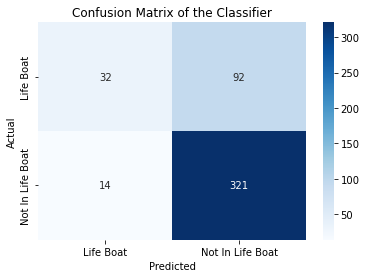

In [27]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Life Boat', 'Not In Life Boat'])

In [28]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6081


In [29]:
# zipping each feature name to its coefficient
logreg_model_values = zip(got[candidate_dict['logit_sig']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -1.02)
('male', -0.74)
('book2_A_Clash_Of_Kings', 1.54)
('book3_A_Storm_Of_Swords', -0.57)
('m_dateOfBirth', 1.03)
('m_mother', 1.27)
('ancient_essos', -0.8)


In [30]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [31]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.7763
Full Tree Testing ACCURACY : 0.7887
Full Tree AUC Score: 0.619


In [32]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 31
False Positives: 93
False Negatives: 4
True Positives : 331



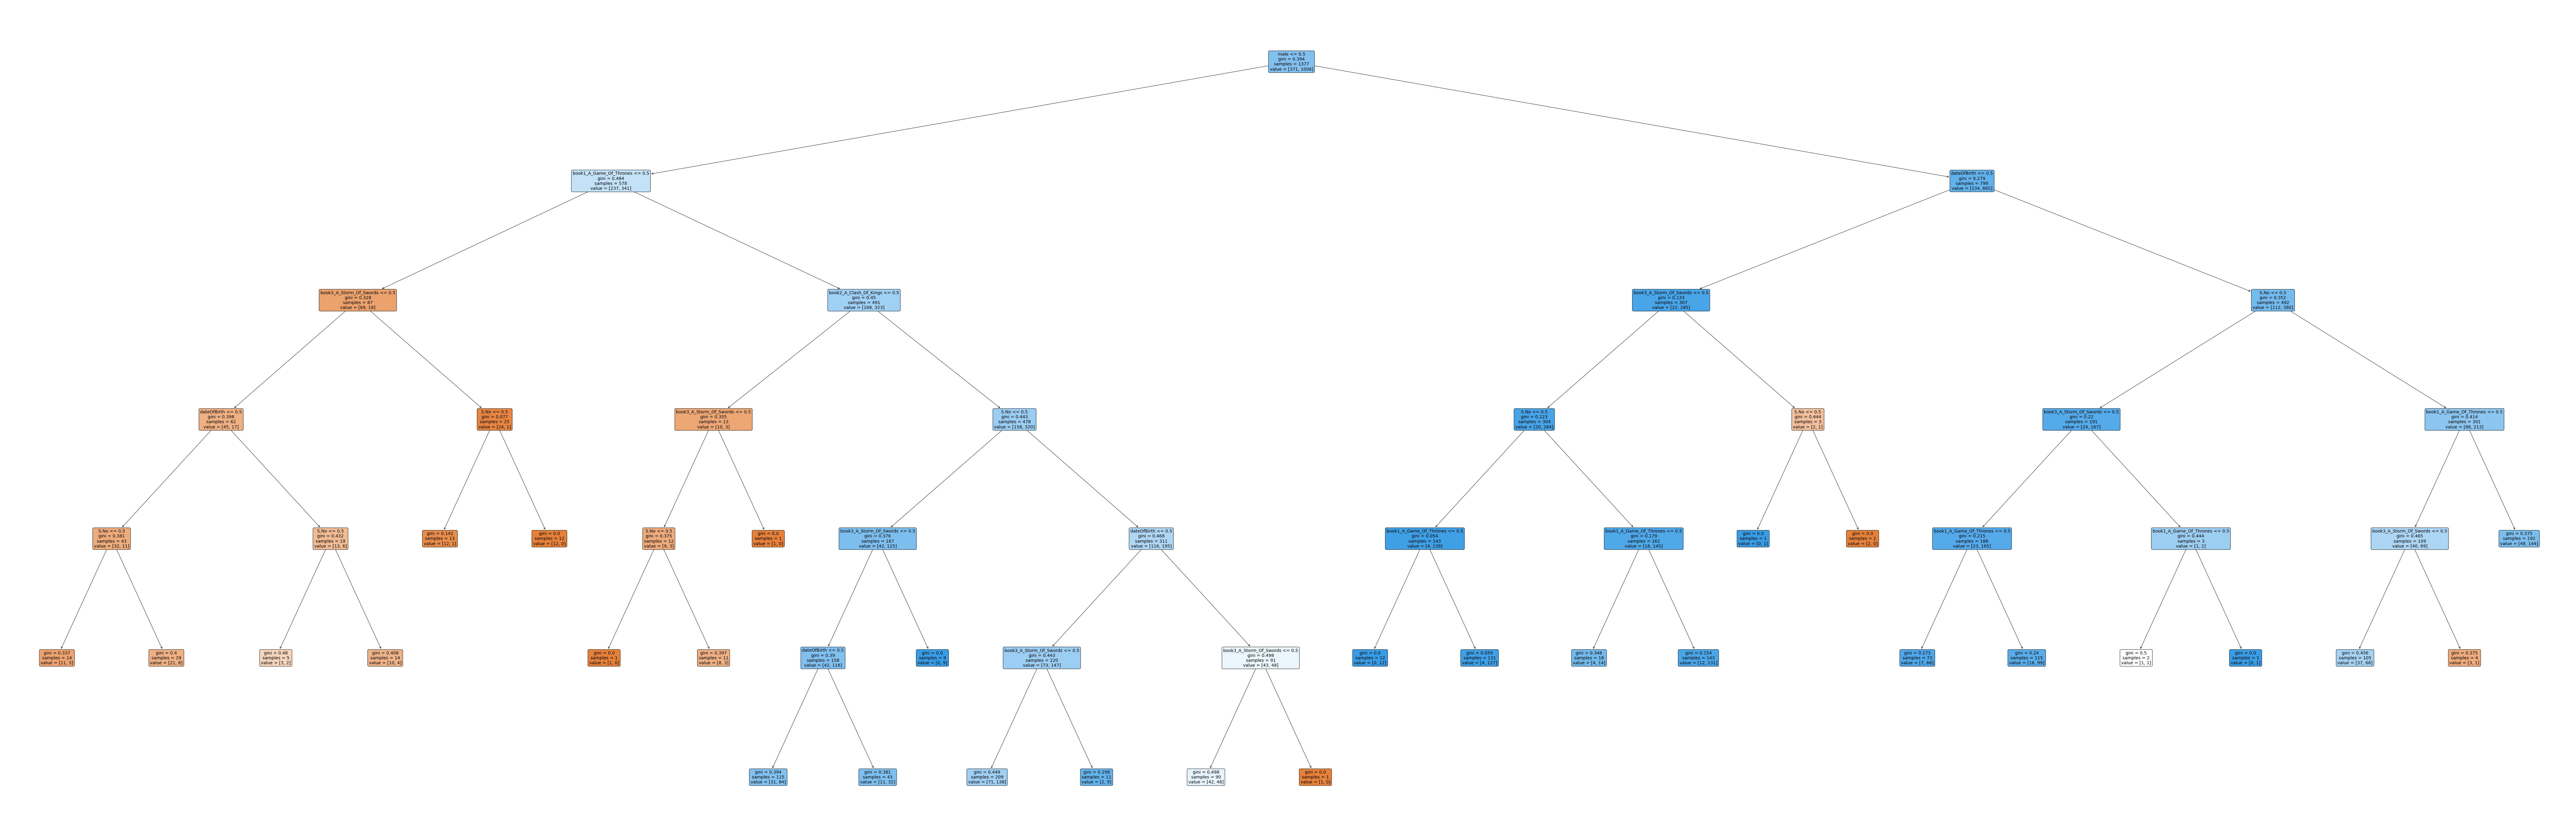

In [33]:
# setting figure size
plt.figure(figsize=(150,50))


# developing a plotted tree
plot_tree(decision_tree = full_tree_fit, 
          feature_names = got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [34]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ran

In [35]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth        = 4,
                                     min_samples_leaf = 25,
                                     random_state     = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pruned_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pruned_pred).round(4) # auc

Training ACCURACY: 0.7676
Testing  ACCURACY: 0.7691
AUC Score        : 0.5827


In [36]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pruned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 22
False Positives: 102
False Negatives: 4
True Positives : 331



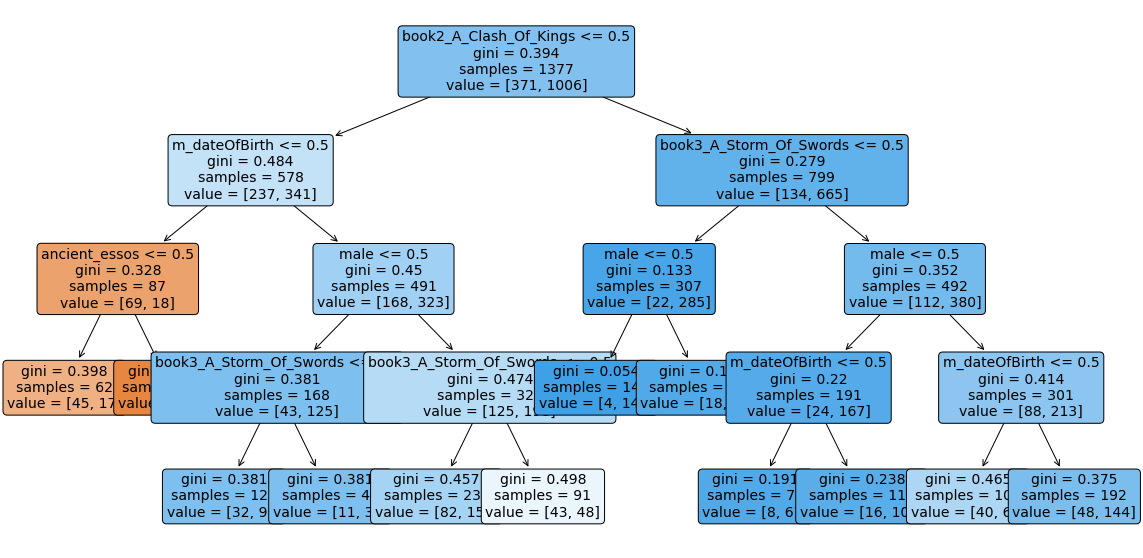

In [37]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = tree_pruned, # changing to pruned_tree_fit
          feature_names = x_train.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

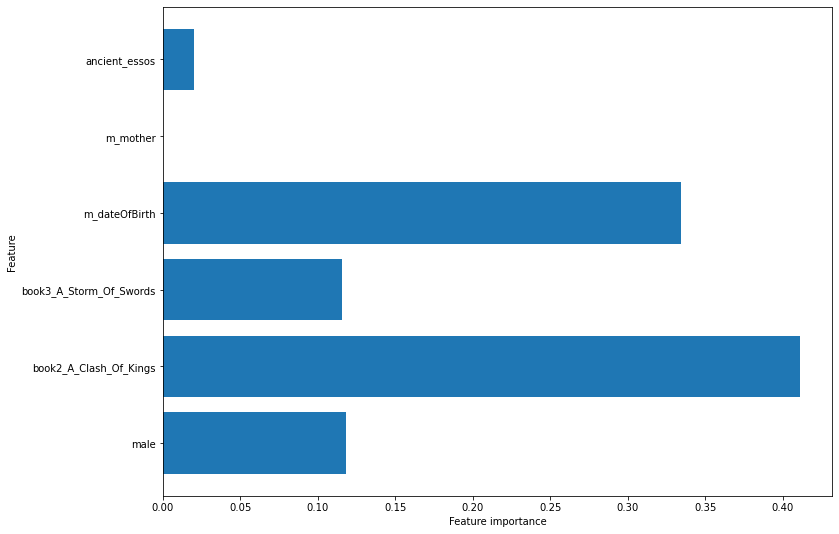

In [38]:
# plotting feature importance
plot_feature_importances(tree_pruned,
                         train = x_train,
                         export = False)

In [39]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./classification_model_performance.xlsx',
                            index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6081         (32, 92, 14, 321)
Full Tree     0.619           (31, 93, 4, 331)
Pruned Tree   0.5827         (22, 102, 4, 331)



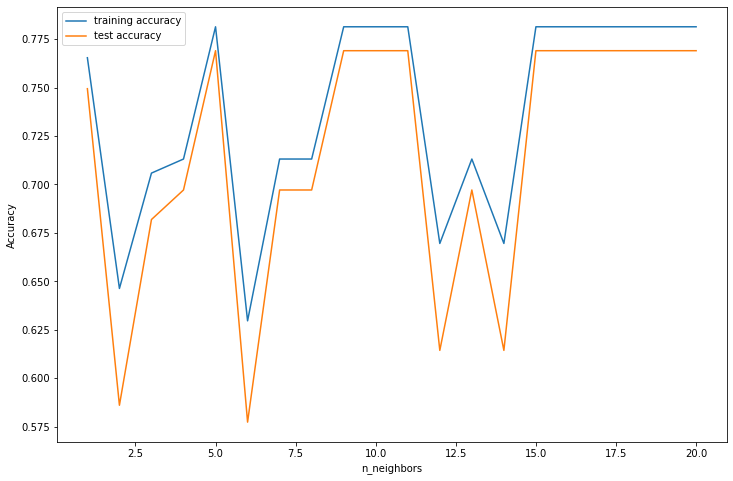

The optimal number of neighbors is: 5


In [40]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = got_data,
                                  y_data        = got_target,
                                  response_type = 'class')

In [41]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(got_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(got_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            got_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = got_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.7712
Testing  ACCURACY: 0.7887
AUC Score        : 0.6444


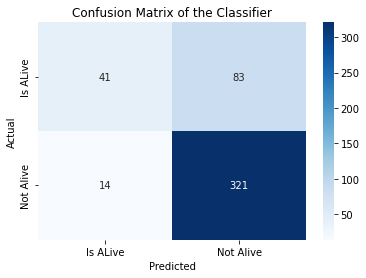

In [42]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Is ALive', 'Not Alive'])

In [43]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 22
False Positives: 102
False Negatives: 4
True Positives : 331



In [44]:
########################################
# importing packages
########################################
import matplotlib.pyplot as plt                      # data visualization
import pandas as pd                                  # data science essentials
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.metrics import confusion_matrix         # confusion matrix


# CART model packages
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots


# new packages
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer


In [45]:
# train/test split with the logit_sig variables
got_data   =  got.loc[ : , candidate_dict['logit_sig']]
got_target =  got.loc[ : , 'isAlive']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = got_target)

In [46]:
##### Tuning classification trees #######################
# declaring a hyperparameter space
criterion_range = ['gini', 'entropy']
splitter_range  = ['best', 'random']
depth_range     = np.arange(1, 8, 0.1)
leaf_range      = np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 4, 'max_depth': 7.500000000000005, 'criterion': 'gini'}
Tuned Training AUC: 0.6094


In [47]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'best',
                                    min_samples_leaf = 4,
                                    max_depth        = 7.500000000000005,
                                    criterion        = 'gini',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7741
Testing  ACCURACY: 0.7865
AUC Score        : 0.615


In [48]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 30
False Positives: 94
False Negatives: 4
True Positives : 331



In [49]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)

# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6081,0.7589,0.7691,"(32, 92, 14, 321)"
1,Full Tree,0.6190,0.7763,0.7887,"(31, 93, 4, 331)"
2,Pruned Tree,0.5827,0.7676,0.7691,"(22, 102, 4, 331)"
3,Tuned Tree,0.6150,0.7741,0.7865,"(30, 94, 4, 331)"


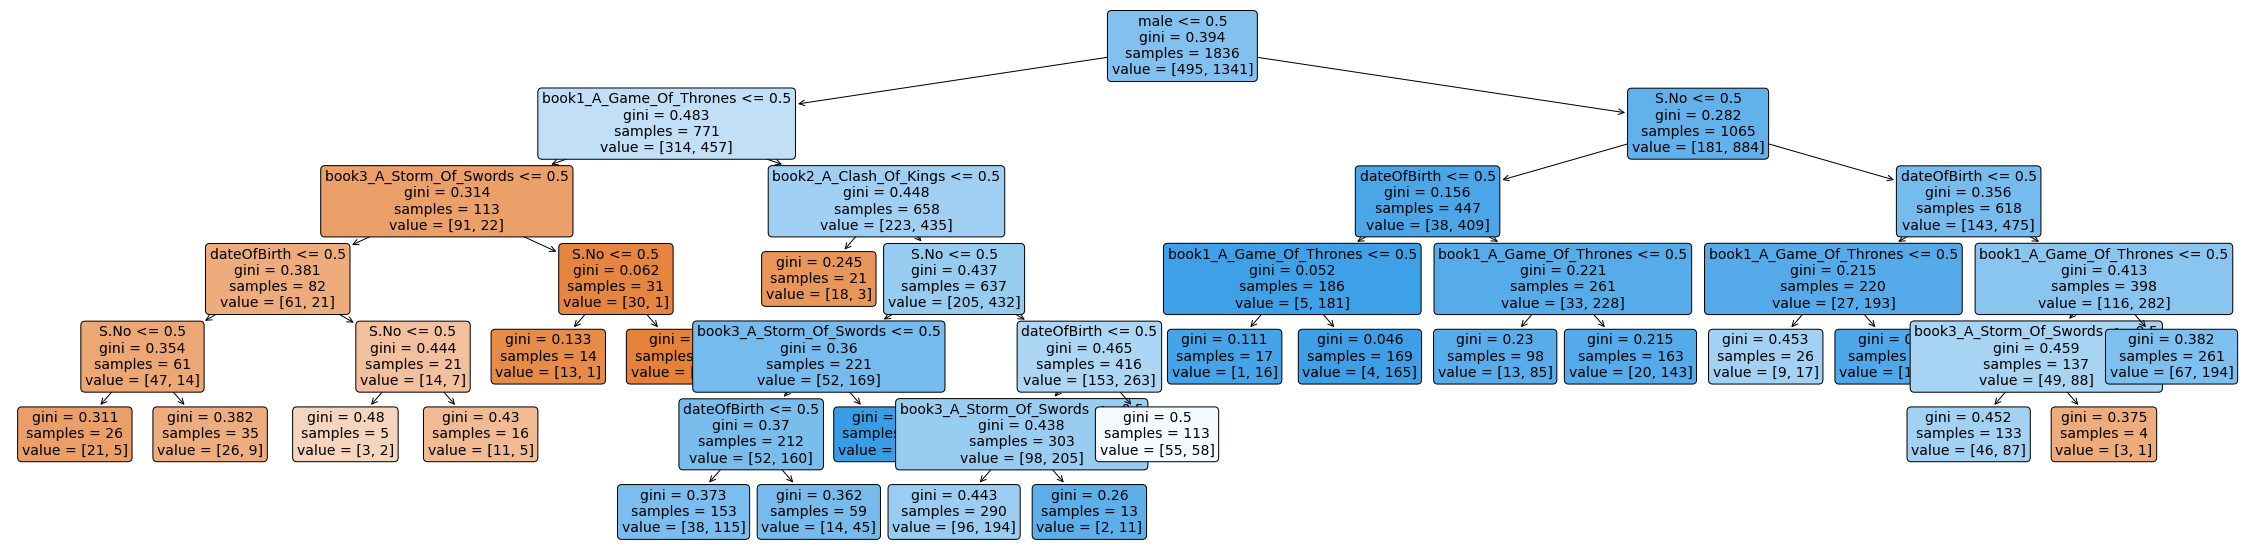

In [50]:
# setting figure size
plt.figure(figsize=(40, 10))


# developing a plotted tree
plot_tree(decision_tree = tree_tuned_fit, 
          feature_names = got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [51]:
# saving the DataFrame to Excel
model_performance.to_excel('./classification_model_performance.xlsx',
                           index = False)

In [52]:
########################################
# importing packages
########################################

# essentials
import matplotlib.pyplot as plt # data visualization
import pandas            as pd  # data science essentials
import numpy             as np  # mathematical essentials


# machine learning
from sklearn.model_selection import train_test_split   # train-test split
from sklearn.metrics import roc_auc_score              # auc score
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.metrics import make_scorer                # customizable scorer
from sklearn.metrics import confusion_matrix           # confusion matrix


# new tools
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


In [53]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [54]:
# train/test split with the logit_sig variables
got_data   =  got.loc[ : , candidate_dict['logit_full']]
got_target =  got.loc[ : , 'isAlive']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = got_target)

In [55]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [56]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.9862
Testing  ACCURACY: 0.7865
AUC Score        : 0.6836


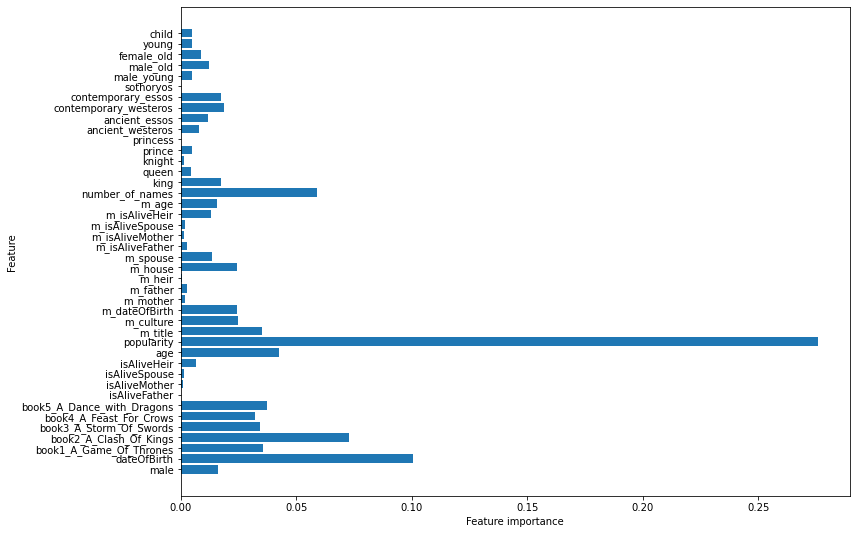

In [57]:
plot_feature_importances(model = rf_default_fit,
                        train  = x_train,
                        export = False)

In [58]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 57
False Positives: 67
False Negatives: 31
True Positives : 304



In [59]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)

# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6081,0.7589,0.7691,"(32, 92, 14, 321)"
1,Full Tree,0.6190,0.7763,0.7887,"(31, 93, 4, 331)"
2,Pruned Tree,0.5827,0.7676,0.7691,"(22, 102, 4, 331)"
3,Tuned Tree,0.6150,0.7741,0.7865,"(30, 94, 4, 331)"
4,Random Forest (Full),0.6836,0.9862,0.7865,"(57, 67, 31, 304)"


In [60]:
# building a model based on hyperparameter tuning results of random forest

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        ='entropy', 
                                      min_samples_leaf = 11,
                                      n_estimators     = 1000,
                                      max_depth        = 8,
                                      random_state     = 219, 
                                      warm_start       = True)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.801
Forest Tuned Testing  ACCURACY: 0.8192
Forest Tuned AUC Score        : 0.6704


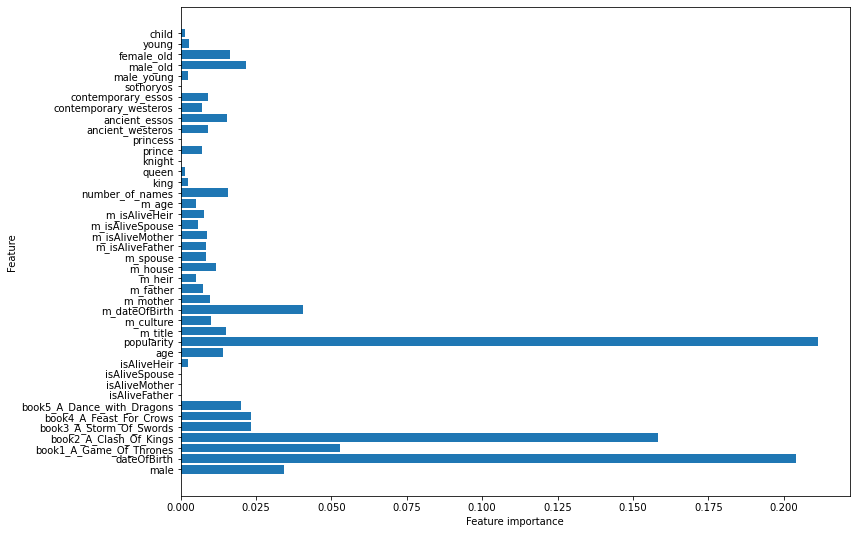

In [61]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [62]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 43
False Positives: 81
False Negatives: 2
True Positives : 333



In [63]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)

# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6081,0.7589,0.7691,"(32, 92, 14, 321)"
1,Full Tree,0.6190,0.7763,0.7887,"(31, 93, 4, 331)"
2,Pruned Tree,0.5827,0.7676,0.7691,"(22, 102, 4, 331)"
3,Tuned Tree,0.6150,0.7741,0.7865,"(30, 94, 4, 331)"
4,Random Forest (Full),0.6836,0.9862,0.7865,"(57, 67, 31, 304)"
5,Tuned Random Forest (Full),0.6704,0.8010,0.8192,"(43, 81, 2, 333)"


In [64]:
# INSTANTIATING the GDM model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 1000,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 8,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.9862
Testing ACCURACY : 0.7952
AUC Score        : 0.6972


In [65]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 60
False Positives: 64
False Negatives: 30
True Positives : 305



In [66]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)

# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6081,0.7589,0.7691,"(32, 92, 14, 321)"
1,Full Tree,0.6190,0.7763,0.7887,"(31, 93, 4, 331)"
2,Pruned Tree,0.5827,0.7676,0.7691,"(22, 102, 4, 331)"
3,Tuned Tree,0.6150,0.7741,0.7865,"(30, 94, 4, 331)"
4,Random Forest (Full),0.6836,0.9862,0.7865,"(57, 67, 31, 304)"
5,Tuned Random Forest (Full),0.6704,0.8010,0.8192,"(43, 81, 2, 333)"
6,GBM (Full),0.6972,0.9862,0.7952,"(60, 64, 30, 305)"


In [67]:
##### Tuning GDM Model #######################
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1,
                                       max_depth     = 3,
                                       n_estimators  = 1000,
                                       warm_start    = False,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.9441
Testing  ACCURACY: 0.9412
AUC Score        : 0.8962


In [68]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 99
False Positives: 25
False Negatives: 2
True Positives : 333



In [69]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)

# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM **',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)

# printing the results

print(f"""{model_performance} 
** Final model. 
 The tuned GDM model has the highest AUC score and a low train-test gap of 0.0029""")

                   Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0                    Logistic     0.6081             0.7589            0.7691  (32, 92, 14, 321)
1                   Full Tree     0.6190             0.7763            0.7887   (31, 93, 4, 331)
2                 Pruned Tree     0.5827             0.7676            0.7691  (22, 102, 4, 331)
3                  Tuned Tree     0.6150             0.7741            0.7865   (30, 94, 4, 331)
4        Random Forest (Full)     0.6836             0.9862            0.7865  (57, 67, 31, 304)
5  Tuned Random Forest (Full)     0.6704             0.8010            0.8192   (43, 81, 2, 333)
6                  GBM (Full)     0.6972             0.9862            0.7952  (60, 64, 30, 305)
7                Tuned GBM **     0.8962             0.9441            0.9412   (99, 25, 2, 333) 
** Final model. 
 The tuned GDM model has the highest AUC score and a low train-test gap of 0.0029
